# Landsat-8,9 L1

Landsat 위성자료를 받고 식생지수(Normalized Difference Vegetation Index (NDVI)) 분석을 수행.

식생지수는 엽록소의 반사와 흡수 파장을 이용하여 식생을 정량화 하는데 사용되며, NDVI 값이 1에 가까울수록 건강한 식생을 의미함.

주로 위성자료를 이용한 광범위한 지역의 가뭄 모니터링, 농업 생산량 예측 및 화재 지역 등의 식생 모니터링을 하는데 활용 됨.


식생지수 = (NIR-Red)/(NIR+Red)



---


Landsat 자료 받는 곳: https://earthexplorer.usgs.gov/
(회원가입해야 데이터 다운로드 가능함)

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 1. Library import

__rasterio__: GeoTIFF와 같은 공간 정보를 포함한 래스테 데이터의 형식을 다루기 위한 python library

__earthpy__: 지구관측 데이터를 쉽게 다루기 위한 python package

In [3]:
!pip install rasterio
!pip install rioxarray
!pip install earthpy

In [4]:
import os
from glob import glob

import matplotlib.pyplot as plt
import geopandas as gpd
import rasterio as rio
import xarray as xr
import rioxarray as rxr
import numpy as np
import earthpy as et
import earthpy.spatial as es
import earthpy.plot as ep
from shapely.geometry import mapping

In [5]:
sat_data_path = '/content/drive/MyDrive/Colab Notebooks/data_landsat/'

### 2. 위성 영상 다루기

In [6]:
def open_clean_band(band_path):
    """A function that opens a Landsat band as an (rio)xarray object

    Parameters
    ----------
    band_path : list
        A list of paths to the tif files that you wish to combine.

    Returns
    -------
    An single xarray object with the Landsat band data.

    """

    return rxr.open_rasterio(band_path, masked=True).squeeze()

In [7]:
feb_data_paths = glob(sat_data_path + 'LC09_L1TP_115035_202503*.TIF')
print(feb_data_paths)
feb_data_paths.sort()
print(feb_data_paths)

['/content/drive/MyDrive/Colab Notebooks/data_landsat/LC09_L1TP_115035_20250326_20250326_02_T1_B2.TIF', '/content/drive/MyDrive/Colab Notebooks/data_landsat/LC09_L1TP_115035_20250326_20250326_02_T1_B3.TIF', '/content/drive/MyDrive/Colab Notebooks/data_landsat/LC09_L1TP_115035_20250326_20250326_02_T1_B4.TIF', '/content/drive/MyDrive/Colab Notebooks/data_landsat/LC09_L1TP_115035_20250326_20250326_02_T1_B7.TIF', '/content/drive/MyDrive/Colab Notebooks/data_landsat/LC09_L1TP_115035_20250326_20250326_02_T1_B5.TIF']
['/content/drive/MyDrive/Colab Notebooks/data_landsat/LC09_L1TP_115035_20250326_20250326_02_T1_B2.TIF', '/content/drive/MyDrive/Colab Notebooks/data_landsat/LC09_L1TP_115035_20250326_20250326_02_T1_B3.TIF', '/content/drive/MyDrive/Colab Notebooks/data_landsat/LC09_L1TP_115035_20250326_20250326_02_T1_B4.TIF', '/content/drive/MyDrive/Colab Notebooks/data_landsat/LC09_L1TP_115035_20250326_20250326_02_T1_B5.TIF', '/content/drive/MyDrive/Colab Notebooks/data_landsat/LC09_L1TP_115035_2

In [8]:
# Open all bands in a loop
all_bands = []
for i, aband in enumerate(feb_data_paths):
    all_bands.append(open_clean_band(aband))
    # Assign a band number to the new xarray object
    all_bands[i]["band"]=i+1

In [9]:
# OPTIONAL: Turn list of bands into a single xarray object
landsat_data = xr.concat(all_bands, dim="band") #[Blue, Green, Red, NIR]
landsat_data

<xarray.DataArray (band: 5, y: 7881, x: 7761)> Size: 1GB
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]], dtype=float32)
Coordinates:
  * band         (band) int64 40B 1 2 3 4 5
  * x            (x) float64 62kB 2.709e+05 2.709e+05 ... 5.037e+05 5.037e+05
  * y            (y) float64 63kB 4.107e+06 4.107e+06 ... 3.871e+06 3.871e+06
    spatial_ref  int64 8B 0
Attributes:
    AREA_OR_POINT:  Point
    scale_factor:   1.0
    add_offset:     0.0

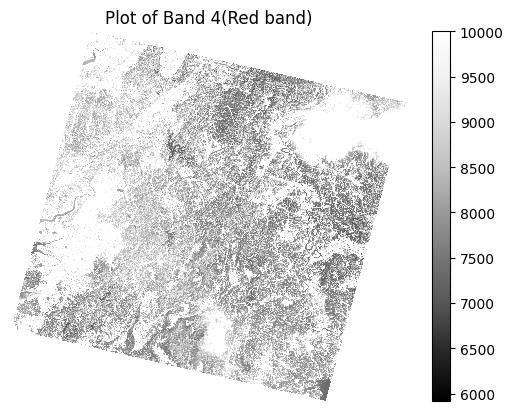

In [10]:
# Plot the data
f, ax = plt.subplots()
data_tmp = np.clip(landsat_data[2], 0, 10000)
#landsat_data[2].plot.imshow(cmap="Greys_r",
#                            ax=ax)
data_tmp.plot.imshow(cmap="Greys_r",
                            ax=ax)
ax.set_title("Plot of Band 4(Red band)")
ax.set_axis_off()
plt.show()

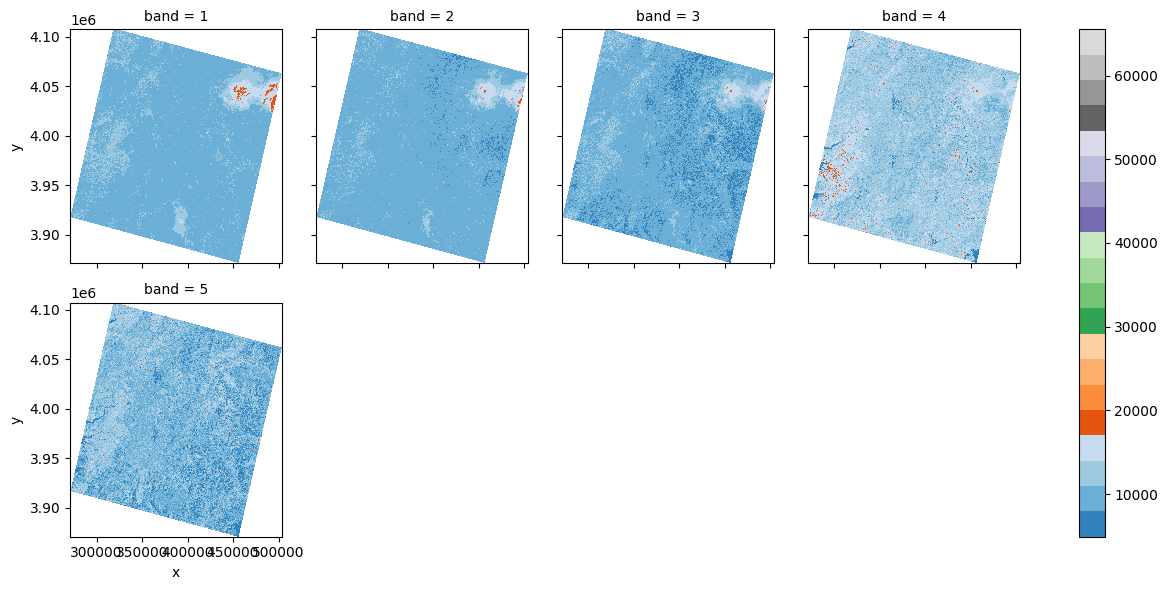

In [11]:
landsat_data.plot.imshow(col="band",
                                 col_wrap=4, cmap='tab20c')
plt.show()

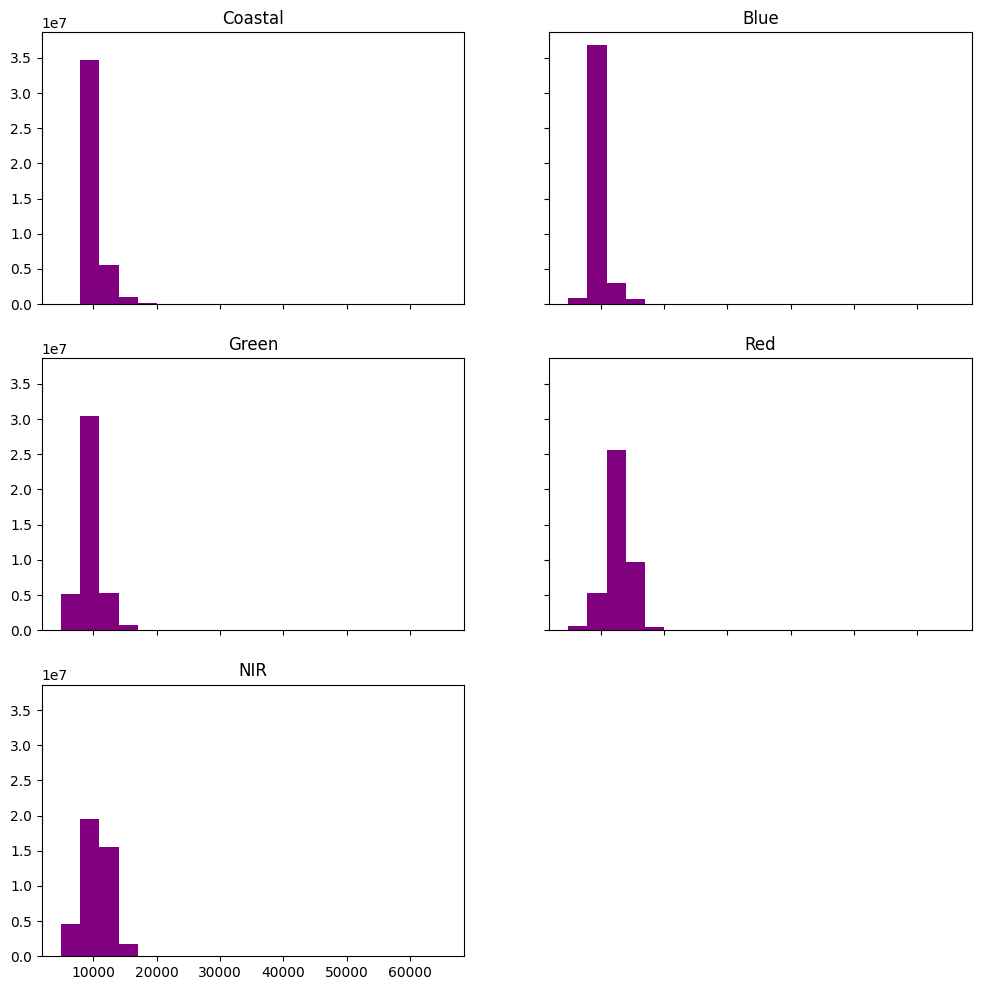

In [12]:
# Plot all band histograms using earthpy
band_titles = ["Coastal",
               "Blue",
               "Green",
               "Red",
               "NIR"]

ep.hist(landsat_data.values,
        title=band_titles)

plt.show()

Landsat-9의 밴드별 조합(https://www.usgs.gov/media/images/common-landsat-band-combinations)

예1. Natural Color = (B4 B3 B2) [Red Green Blue]

In [16]:
aaa = np.clip(landsat_data.values,0, 10000)

/usr/local/lib/python3.11/dist-packages/earthpy/spatial.py:561: RuntimeWarning: invalid value encountered in cast
  return (bytedata.clip(low, high) + 0.5).astype("uint8")


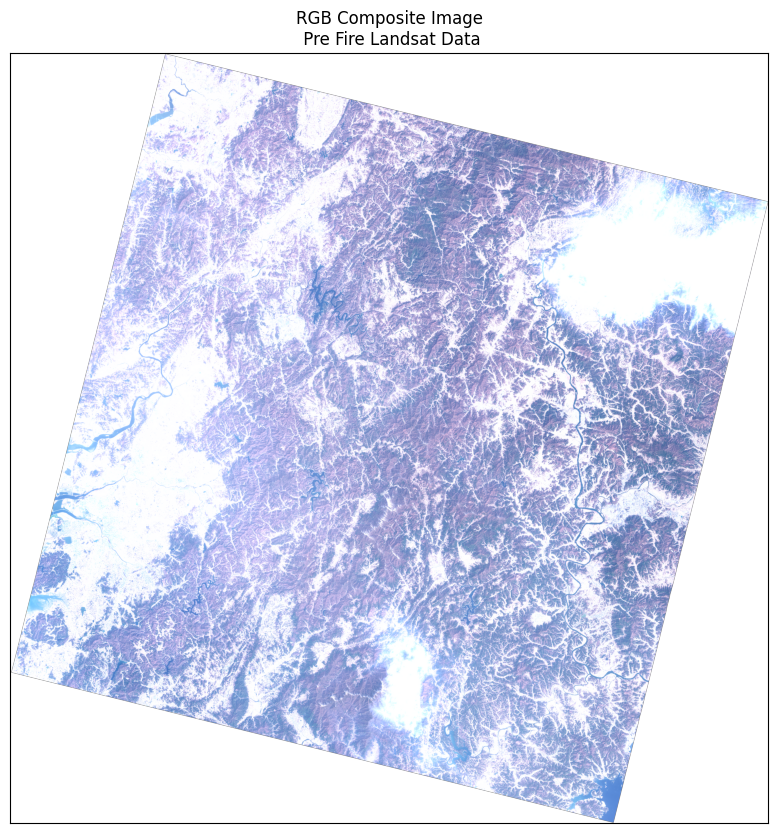

In [17]:
ep.plot_rgb(aaa,
            rgb=[2, 1, 0],
            title="RGB Composite Image\n Pre Fire Landsat Data")
plt.show()

/usr/local/lib/python3.11/dist-packages/earthpy/spatial.py:561: RuntimeWarning: invalid value encountered in cast
  return (bytedata.clip(low, high) + 0.5).astype("uint8")


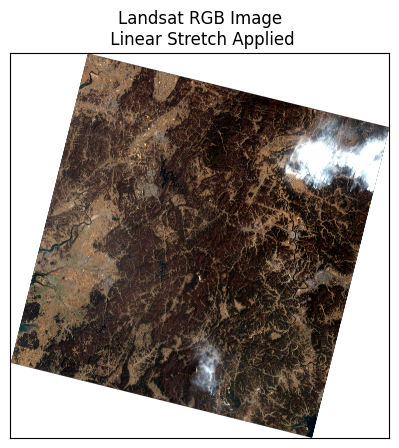

In [18]:
ep.plot_rgb(landsat_data.values,
            figsize = (5,5),
            rgb=[2, 1, 0],
            title="Landsat RGB Image\n Linear Stretch Applied",
            stretch=True,
            str_clip=2)
plt.show()

(7881, 7761)


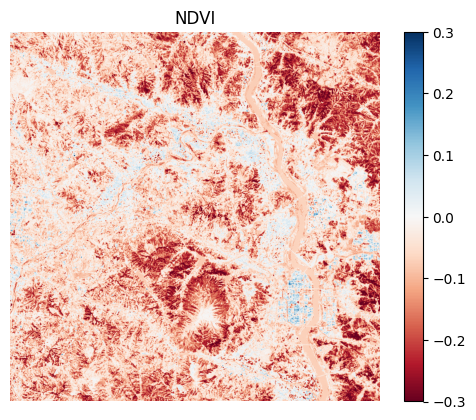

In [25]:
feb_ndvi = (landsat_data[4].values - landsat_data[3].values)/(landsat_data[4].values + landsat_data[3].values)
feb_ndwi = (landsat_data[4].values - landsat_data[2].values)/(landsat_data[4].values + landsat_data[2].values)
print(feb_ndvi.shape)

feb_ndvi2 = feb_ndvi[3000:4000,5000:6000]
feb_ndwi2 = feb_ndwi[3000:4000,5000:6000]
f, ax = plt.subplots()

plt.imshow(feb_ndvi2, cmap="RdBu", vmin=-0.3, vmax=0.3)
ax.set_title("NDVI")
ax.set_axis_off()
plt.colorbar()
plt.show()

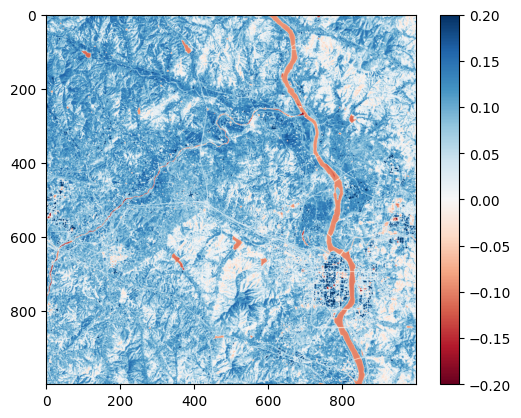

In [26]:
plt.imshow(feb_ndwi2, cmap="RdBu", vmin=-0.2, vmax=0.2)
ax.set_title("NDVI_pre")
ax.set_axis_off()
plt.colorbar()
plt.show()